### 1. Апостериорное распределение для параметра распределения Пуассона. ###




1. $P(\lambda) = p_0(\lambda) \rightarrow p_0(0)$ - считаем $P(\lambda)$ константой и заменяем ее $p_0(0)$. \\
Теорема Байеса:
$$
P(λ \mid m)=\frac{P(m \mid λ) \cdot P(λ)}{P(m)}=\frac{P(m \mid λ) \cdot p_0(0)}{\int d λ \cdot P(m \mid λ) \cdot p_0(0)} = \frac{p_λ(m)}{\int d λ \cdot p_λ(m)}=\frac{\frac{\lambda^m}{m !} e^{-\lambda}}{\int d λ \cdot \frac{\lambda^m}{m !} e^{-\lambda}}=\frac{\lambda^m}{m !} e^{-\lambda}
$$
2. $P(\lambda)\stackrel{\text{redefine}}{=}P(\lambda \mid m)$ \\
Тогда теорема Байеса:
$$P(λ \mid m')=\frac{P(m' \mid λ) \cdot P(λ)}{P(m')}=\frac{P(m' \mid λ) \cdot P(λ)}{\int d λ \cdot P(m' \mid λ) \cdot P(λ)} = \frac{p_λ(m') \cdot \frac{\lambda^m}{m !} e^{-\lambda}}{\int d λ \cdot p_λ(m') \cdot \frac{\lambda^m}{m !} e^{-\lambda}}=\frac{\frac{\lambda^{m+m'}}{m'! \cdot m !} e^{-2\lambda}}{\int d λ \cdot \frac{\lambda^{m+m'}}{m'! \cdot m !} e^{-2\lambda}}=\frac{\frac{\lambda^{m+m'}}{m'! \cdot m !} e^{-2\lambda}}{2^{-m-m'-1}\frac{(m+m')!}{m!\cdot m'!}}=\frac{\lambda^{m+m'}e^{-2\lambda}}{2^{-m-m'-1}(m+m')!}
$$


### 2. Апостериорное распределение для аргумента нормального распределения.


Пусть $P(A)=I(A)$ (равномерное распределение).
$$
P(A|x_1) = \frac{P(x_1|A) \cdot P(A)}{P(x_1)} = \frac{p_0(x_1) \cdot P(A)}{\int dA \cdot p_0(x_1) \cdot P(A)} = \frac{p_0(x_1) \cdot I(A)}{\int dA \cdot p_0(x_1) \cdot I(A)} = \frac{e^{-\frac{x_1^T A x_1}{2}} I(A)}{\int dA \cdot e^{-\frac{x_1^T A x_1}{2}} I(A)} = C \cdot e^{-\frac{x_1^T A x_1}{2}} I(A),
$$
где $C$ — некоторый нормировочный множитель.

Теперь вычислим $P(x|x_1)$:
$$
P(x|x_1) = \int dA \cdot P(x|A) \cdot P(A|x_1).
$$

Подставляя $P(x|A) \propto e^{-\frac{x^T A x}{2}}$ и $P(A|x_1) \propto e^{-\frac{x_1^T A x_1}{2}} I(A)$, получаем:
$$
P(x|x_1) \propto \int dA \cdot e^{-\frac{x^T A x}{2}} \cdot e^{-\frac{x_1^T A x_1}{2}} \cdot I(A).
$$

Представим $A$ как диагональную матрицу с элементами $s_1^2, \dots, s_n^2$. Тогда интеграл становится:
$$
P(x|x_1) \propto \int ds_1 \dots ds_n \cdot e^{-\frac{x^T (s_1^2 + \dots + s_n^2) x}{2}} \cdot e^{-\frac{x_1^T (s_1^2 + \dots + s_n^2) x_1}{2}} \cdot s_1 \dots s_n.
$$

После упрощения:
$$
P(x|x_1) = \text{const} \cdot \frac{1}{(x^T x + x_1^T x_1)^2}.
$$


### 3. L1-регуляризация.


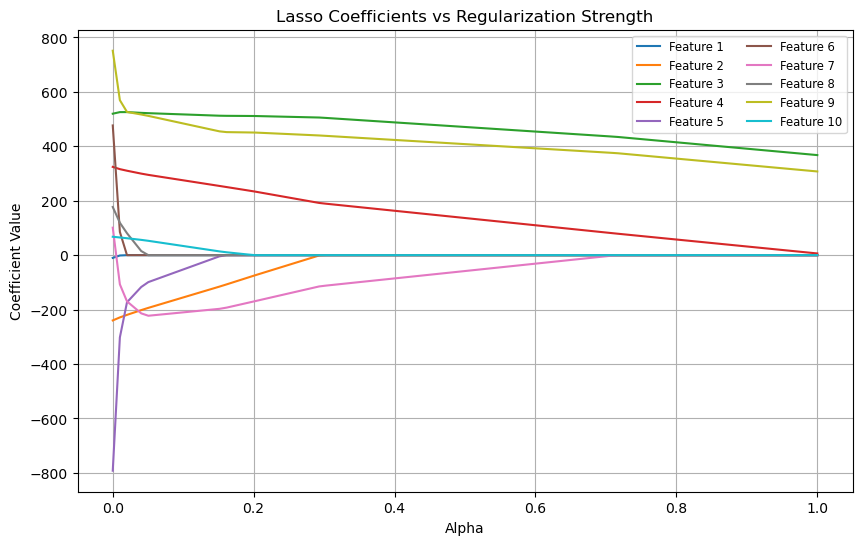

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

data, target = load_diabetes(return_X_y=True)
alpha_values = np.linspace(1e-6, 1, 100)  
num_features = data.shape[1]  
coefficients = np.zeros((len(alpha_values), num_features)) 

for idx, alpha in enumerate(alpha_values):
    model = Lasso(alpha=alpha)
    model.fit(data, target)
    coefficients[idx, :] = model.coef_

plt.figure(figsize=(10, 6))
for feature_idx in range(num_features):
    plt.plot(alpha_values, coefficients[:, feature_idx], label=f'Feature {feature_idx + 1}')

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Regularization Strength')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid()
plt.show()


### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.


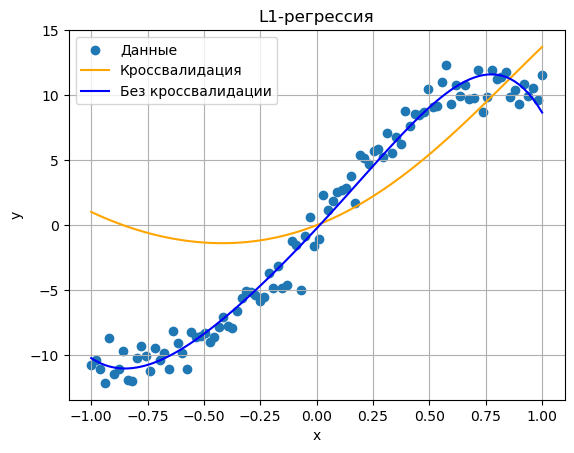

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
n = 100
eps = 1e-4
mu = 0.01
alpha = 0.001

# Генерация данных
x0 = np.linspace(-1, 1, n)
y0 = 10 * np.sin(2 * x0) + x0 + np.random.normal(0, 1, size=n)

def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w

def L(X, y, w, mu):
    return (np.linalg.norm(X @ w - y))**2 / n + mu * np.linalg.norm(w, 1)

def train_L1_regression(x, y, w_init, mu, alpha, eps):
    """Обучение L1-регрессии с использованием градиентного спуска."""
    X = np.vstack([x**i for i in range(len(w_init))]).T  # Матрица признаков
    w_prev = np.copy(w_init)
    w_next = make_L1_regression_grad_descent_iteration(X, y, np.copy(w_prev), mu, alpha)
    
    while np.abs(L(X, y, w_prev, mu) - L(X, y, w_next, mu)) > eps:
        w_prev, w_next = w_next, make_L1_regression_grad_descent_iteration(X, y, np.copy(w_next), mu, alpha)
    
    return w_next

# Инициализация коэффициентов
w_initial = [0.0, 1.0, 10.0, 0.0, 0.0, 0.0]
w_final = np.copy(w_initial)

# Кроссвалидация
splits = [slice(0, n//3), slice(n//3, 2*n//3), slice(2*n//3, n)]
for split in splits:
    x, y = x0[split], y0[split]
    w_trained = train_L1_regression(x, y, w_final, mu, alpha, eps)
    w_final = (w_final * len(splits) + w_trained) / (len(splits) + 1)

# Построение финальной модели после кроссвалидации
plt.scatter(x0, y0, label='Данные')
plt.plot(
    x0,
    sum(w_final[i] * x0**i for i in range(len(w_final))),
    label='Кроссвалидация',
    color='orange'
)

# Модель без кроссвалидации
w_no_cv = train_L1_regression(x0, y0, w_initial, mu, alpha, eps)
plt.plot(
    x0,
    sum(w_no_cv[i] * x0**i for i in range(len(w_no_cv))),
    label='Без кроссвалидации',
    color='blue'
)

# Оформление графика
plt.legend()
plt.title('L1-регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


### 5. Лассо Тибширани: связь L1 и L2 между собой.


Если $x^*$ минимизирует выражение при наложенных ограничениях, то найдётся вектор множителей Лагранжа $\lambda \in \mathbb{R} ^{m}$ такой, что для функции Лагранжа $L(x)=f(x)+\sum _{{i=1}}^{m}\lambda _{i}g_{i}(x)$ выполняются условия:

стационарности:
$\min _{x}L(x)=L(x^*)$;

дополняющей нежёсткости: $\lambda _{i}g_{i}({\hat  {x}})=0,\;i=1\ldots m$;

неотрицательности: $\lambda _{i}\geqslant 0,\;i=1\ldots m$.

А условие стационарности эквивалентно $L_1$-регуляризации, т.к. в ней нужно минимизировать выражение $\mathcal{L}=f(x)+\mu \sum_\alpha\left|\text w_\alpha\right|,$ где $f(x)=\frac{1}{N}\left\|X\mathbf w-Y\right\|^2$. Минимизация выражения - это его стационарное состояние.